In [80]:
import cv2 #importing cv(computer vision) Library
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
# This variable stores the path of the SSD_mob_v3 which is used for object detection 
# "SSD MobileNet V3" ek tarah ka model hai jo object detection ke liye use hota hai. 
# "coco_2020_01_14" refers to the dataset used for training the model.
# COCO dataset mein bahut saare (80) categories ke objects hote hain, jaise ki cars, people, animals, etc.

frozen_model = 'frozen_inference_graph.pb' #The frozen model file contains the trained weights of the model
import matplotlib.pyplot as plt


In [81]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)
'''
Is line mein hum ek instance bana rahe hain cv2.dnn_DetectionModel class ka,
jo ek deep learning-based object detection model ko represent karta hai.
'''
model

< cv2.dnn.DetectionModel 000001C50BB3A530>

In [83]:
classLabels=[]
file_name = 'labels.txt'
with open(file_name,'rt') as ftp:
    classLabels = ftp.read().rstrip('\n').split('\n')
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [84]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001C502E64FD0>

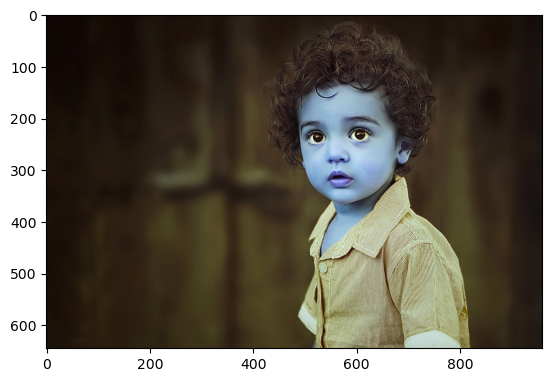

In [100]:
# img = cv2.imread('car.jpg')
# img = cv2.imread('frds.jpg')
img = cv2.imread('boy.jpg')
# img = cv2.imread('friends.jpg')
plt.imshow(img)

In [101]:
ClassIndex , confidence , bbox = model.detect(img,confThreshold = 0.5)
'''
Is line mein model ka use karke input image mein objects ko detect kiya jaata hai. 
Ye teen values return karta hai: ClassIndex (har object ke detected class ka index), 
confidence (har detection ke confidence score), aur bbox (har detection ke bounding box coordinates). 
confThreshold parameter valid detection ke liye minimum confidence score ko specify karta hai.
'''
None

In [102]:
print(ClassIndex)

[1]


In [103]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for classInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    '''
    Iss line mein detect kiye gaye objects par loop shuru hota hai. 
    Yeh har detected object ke class index, confidence score, aur bounding box coordinates par iterate karta hai.
    '''
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[classInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale = font_scale,color=(0,255,0),thickness = 3)

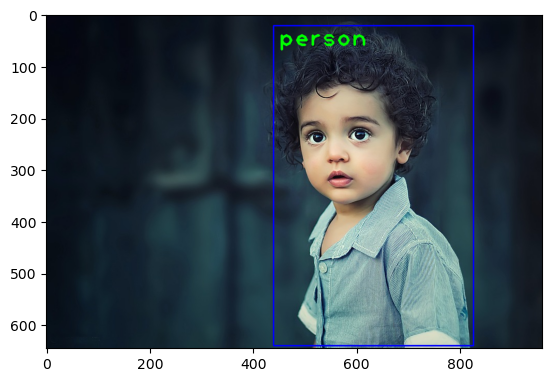

In [104]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))